In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, PowerTransformer
from sklearn.metrics import r2_score, confusion_matrix ,  plot_roc_curve , classification_report , accuracy_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from mpl_toolkits.mplot3d import Axes3D
from collections import Counter
from imblearn.over_sampling import SMOTE

#import sklearn.feature_extraction.text
from sklearn.feature_extraction.text import CountVectorizer
#import sklearn.feature_extraction.text.CountVectorizer
import nltk
import re


## Reading data and small checking of whats in the data

In [2]:
df = pd.read_csv('../data/spam_or_not_spam.csv', delimiter=',', nrows = None)

In [3]:
df.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [4]:
df.describe()

,label
count,3000.000000
mean,0.166667
std,0.372740
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   2999 non-null   object
 1   label   3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


### Removing NaN values

In [6]:
df.dropna(inplace= True) 

In [7]:
df.describe()

,label
count,2999.000000
mean,0.166389
std,0.372491
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2999 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   2999 non-null   object
 1   label   2999 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 70.3+ KB


### Testing with Stopwords, email data treatment

In [9]:
nltk.download("stopwords")
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\juan9\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\juan9\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
print(nltk.corpus.stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [11]:
stop_words = set(nltk.corpus.stopwords.words("english"))
sample_sentence = df.email[0]
print(sample_sentence)

 date wed NUMBER aug NUMBER NUMBER NUMBER NUMBER NUMBER from chris garrigues cwg dated NUMBER NUMBERfaNUMBERd deepeddy com message id NUMBER NUMBER tmda deepeddy vircio com i can t reproduce this error for me it is very repeatable like every time without fail this is the debug log of the pick happening NUMBER NUMBER NUMBER pick_it exec pick inbox list lbrace lbrace subject ftp rbrace rbrace NUMBER NUMBER sequence mercury NUMBER NUMBER NUMBER exec pick inbox list lbrace lbrace subject ftp rbrace rbrace NUMBER NUMBER sequence mercury NUMBER NUMBER NUMBER ftoc_pickmsgs NUMBER hit NUMBER NUMBER NUMBER marking NUMBER hits NUMBER NUMBER NUMBER tkerror syntax error in expression int note if i run the pick command by hand delta pick inbox list lbrace lbrace subject ftp rbrace rbrace NUMBER NUMBER sequence mercury NUMBER hit that s where the NUMBER hit comes from obviously the version of nmh i m using is delta pick version pick nmh NUMBER NUMBER NUMBER compiled on URL at sun mar NUMBER NUMBER N

In [12]:
word_tokens = nltk.tokenize.word_tokenize(sample_sentence)
filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
print(filtered_sentence)

['date', 'wed', 'NUMBER', 'aug', 'NUMBER', 'NUMBER', 'NUMBER', 'NUMBER', 'NUMBER', 'chris', 'garrigues', 'cwg', 'dated', 'NUMBER', 'NUMBERfaNUMBERd', 'deepeddy', 'com', 'message', 'id', 'NUMBER', 'NUMBER', 'tmda', 'deepeddy', 'vircio', 'com', 'reproduce', 'error', 'repeatable', 'like', 'every', 'time', 'without', 'fail', 'debug', 'log', 'pick', 'happening', 'NUMBER', 'NUMBER', 'NUMBER', 'pick_it', 'exec', 'pick', 'inbox', 'list', 'lbrace', 'lbrace', 'subject', 'ftp', 'rbrace', 'rbrace', 'NUMBER', 'NUMBER', 'sequence', 'mercury', 'NUMBER', 'NUMBER', 'NUMBER', 'exec', 'pick', 'inbox', 'list', 'lbrace', 'lbrace', 'subject', 'ftp', 'rbrace', 'rbrace', 'NUMBER', 'NUMBER', 'sequence', 'mercury', 'NUMBER', 'NUMBER', 'NUMBER', 'ftoc_pickmsgs', 'NUMBER', 'hit', 'NUMBER', 'NUMBER', 'NUMBER', 'marking', 'NUMBER', 'hits', 'NUMBER', 'NUMBER', 'NUMBER', 'tkerror', 'syntax', 'error', 'expression', 'int', 'note', 'run', 'pick', 'command', 'hand', 'delta', 'pick', 'inbox', 'list', 'lbrace', 'lbrace', '

In [13]:
new_sentence = " ".join(filtered_sentence)
print(new_sentence)

date wed NUMBER aug NUMBER NUMBER NUMBER NUMBER NUMBER chris garrigues cwg dated NUMBER NUMBERfaNUMBERd deepeddy com message id NUMBER NUMBER tmda deepeddy vircio com reproduce error repeatable like every time without fail debug log pick happening NUMBER NUMBER NUMBER pick_it exec pick inbox list lbrace lbrace subject ftp rbrace rbrace NUMBER NUMBER sequence mercury NUMBER NUMBER NUMBER exec pick inbox list lbrace lbrace subject ftp rbrace rbrace NUMBER NUMBER sequence mercury NUMBER NUMBER NUMBER ftoc_pickmsgs NUMBER hit NUMBER NUMBER NUMBER marking NUMBER hits NUMBER NUMBER NUMBER tkerror syntax error expression int note run pick command hand delta pick inbox list lbrace lbrace subject ftp rbrace rbrace NUMBER NUMBER sequence mercury NUMBER hit NUMBER hit comes obviously version nmh using delta pick version pick nmh NUMBER NUMBER NUMBER compiled URL sun mar NUMBER NUMBER NUMBER NUMBER ict NUMBER relevant part mh_profile delta mhparam pick seq sel list since pick command works sequenc

### Stopwords actual Treatment

In [14]:
X =  df.iloc[:,0].values
y = df.iloc[:,-1].values

corpus = []

stop_words = set(nltk.corpus.stopwords.words("english"))
for i in range(len(X)):
    X[i] = nltk.tokenize.word_tokenize(X[i])
    X[i] = [w for w in X[i] if not w.lower() in stop_words]
    X[i] = " ".join(X[i])
    stemmer = nltk.stem.porter.PorterStemmer()
    X[i] = X[i].lower()
    X[i] = X[i].split()
    email =  [stemmer.stem(J) for J in X[i] ]
    email = ' '.join(email)
    corpus.append(email)

In [15]:
v = CountVectorizer()
X = v.fit_transform(corpus).toarray()

In [16]:
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]


### Split Train Test

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2399, 25670)
(600, 25670)
(2399,)
(600,)


## Training

In [18]:
svc = SVC()

cv_score = cross_val_score(svc, X_train, y_train, cv = 5)

In [19]:
cv_score.mean()

0.9387265135699373

In [20]:
random = RandomForestClassifier(n_estimators= 100)

rf_score = cross_val_score(random, X_train, y_train, cv = 5)

In [21]:
rf_score.mean()

0.9737386917188587

In [22]:
decision = DecisionTreeClassifier()

dt_score = cross_val_score(decision, X_train, y_train, cv = 5)

In [23]:
dt_score.mean()

0.949980862908838

In [24]:
knn = KNeighborsClassifier()

knn_score = cross_val_score(knn, X_train, y_train, cv = 5)

In [25]:
knn_score.mean()

0.8728636047320807

RandomForest has the highest score. 

## Testing 

In [26]:
random.fit(X_train, y_train)

RandomForestClassifier()

In [27]:
y_pred = random.predict(X_test)

Accuracy

In [28]:
acc = accuracy_score(y_test, y_pred)
print(acc)

0.9833333333333333


In [29]:
cc =  classification_report(y_test,y_pred)
print(cc)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       500
           1       0.96      0.94      0.95       100

    accuracy                           0.98       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.98      0.98      0.98       600



[[496   4]
 [  6  94]]


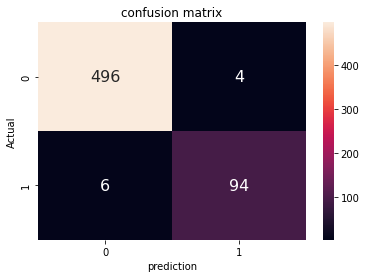

In [30]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
df_cm = pd.DataFrame(cm, index = [i for i in range(2)],
                  columns = [i for i in range(2)])
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='d')
plt.title('confusion matrix')
plt.xlabel('prediction')
plt.ylabel('Actual');

D:\UAB Programs\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


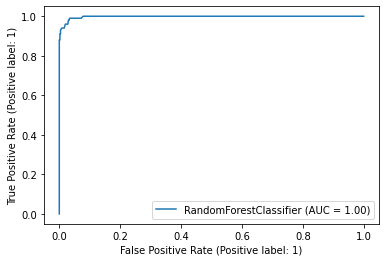

In [31]:
plot_roc_curve(random, X_test, y_test)
plt.show()